In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


# Animaciones

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
# Leer el archivo
gapminder = pd.read_csv("https://raw.githubusercontent.com/OHI-Science/data-science-training/master/data/gapminder.csv")
# Modificar el dataset
gapminder = gapminder.assign(
  log_gdp=lambda df: np.log(df["gdpPercap"]),
  log_pop=lambda df: np.log(df["pop"]),
  decade=lambda df: np.floor(df["year"] / 10) * 10
)
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap,log_gdp,log_pop,decade
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.658583,15.946754,1950.0
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,6.710344,16.039154,1950.0
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,6.748878,16.144454,1960.0
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,6.728864,16.261154,1960.0
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,6.606625,16.386554,1970.0


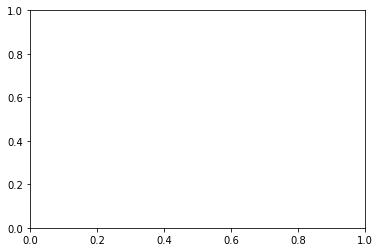

In [ ]:
from matplotlib import animation
import matplotlib.pyplot as plt
# Paises a graficar
paises_plot = ['Spain', 'Italy', 'United States']
linea_plot = gapminder.loc[gapminder['country'].isin(paises_plot), :]

# Definir los colores
colors = ['red', 'green', 'blue']
# Definir la figura
fig, ax = plt.subplots()

def update_linechart(i):
  for j in range(len(colors)):
    country = paises_plot[j]
    color = colors[j]
    data = linea_plot.loc[linea_plot['country'] == country,:]
    ax.plot(data.year[:i], data.gdpPercap[:i], color)

In [ ]:
num_frames = len(linea_plot['year'].unique())        
animacion = animation.FuncAnimation(fig, update_linechart, frames = num_frames)
#Interval=  Delay between frames in milliseconds.
# guardar la animacion en la ruta dada
plt.show(animacion)

In [ ]:
from IPython.display import HTML
HTML(animacion.to_html5_video())

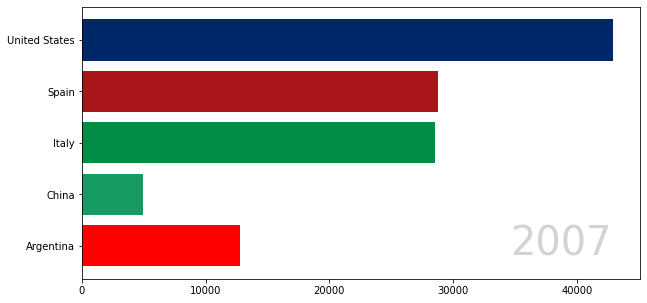

In [ ]:
paises_plot = ['Spain', 'Italy', 'United States','Argentina','China']
barchart_data  = gapminder.loc[gapminder['country'].isin(paises_plot), :]

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

colors =['#FF0000','#169b62','#008c45','#aa151b','#002868']

data_temp = barchart_data.loc[barchart_data['year'] == 2007, :]

fig, ax = plt.subplots(figsize=(10, 5))
ax.clear()
ax.barh(data_temp.country,data_temp.gdpPercap, color = colors)

ax.text(0.95, 0.2, data_temp['year'].iloc[0],
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,
       fontdict=font)
plt.show()

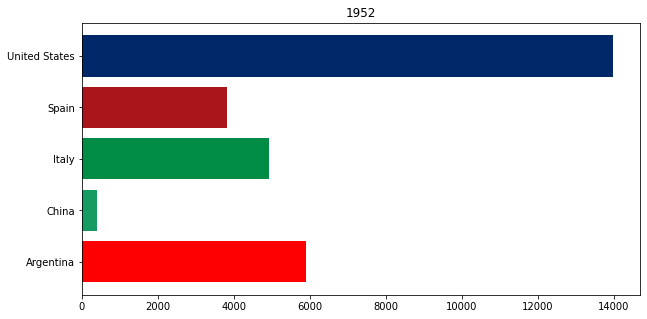

In [ ]:
paises_plot = ['Spain', 'Italy', 'United States','Argentina','China']
barchart_data  = gapminder.loc[gapminder['country'].isin(paises_plot), :]

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

years = barchart_data['year'].unique()
colors =['#FF0000','#169b62','#008c45','#aa151b','#002868']

fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, years[0],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

def update_barchart(i):
  year = years[i]
  data_temp = barchart_data.loc[barchart_data['year'] == year, :]
  ax.clear()
  ax.barh(data_temp.country,data_temp.gdpPercap, color = colors)
  label.set_text(year)
  ax.set_title(str(year))

animacion = animation.FuncAnimation(fig, update_barchart, frames = len(years),interval = 1000)
#anim.save('barchart.gif')  

In [ ]:
from IPython.display import HTML
HTML(animacion.to_html5_video())

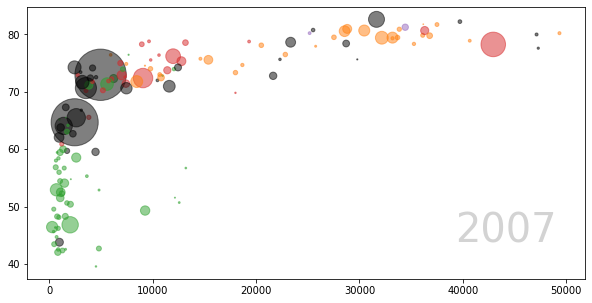

In [ ]:
import numpy as np
import matplotlib

fig, ax = plt.subplots(figsize=(10, 5))

scatter_data = gapminder.copy()

# Colores de acuerdo a la condicion
conditions = [
  scatter_data.continent == 'Asia',
  scatter_data.continent == 'Europe',
  scatter_data.continent == 'Africa',
  scatter_data.continent == 'Americas',
  scatter_data.continent == 'Oceania',
]

values = list(range(5))

scatter_data['color'] = np.select(conditions, values)


font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

years = scatter_data['year'].unique()

data_temp = scatter_data.loc[scatter_data['year'] == years[-1], :]
label = ax.text(0.95, 0.25, years[-1],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

colors =[f'C{i}' for i in np.arange(1, 6)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(1, 5+2), colors)

scatter = ax.scatter(data_temp.gdpPercap,
                     data_temp.lifeExp,
                     s=data_temp['pop']/500000, 
                     alpha = 0.5, 
                     c=data_temp.color, 
                     cmap=cmap,
                     norm=norm)
label.set_text(years[-1])
plt.show()

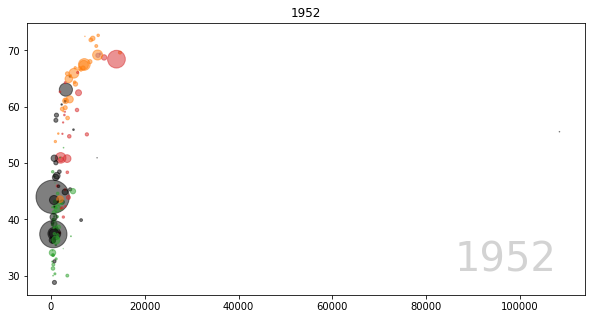

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

years = scatter_data['year'].unique()

colors =[f'C{i}' for i in np.arange(1, 6)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(1, 5+2), colors)


label = ax.text(0.95, 0.25, years[0],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)


def update_scatter(i):
    year = years[i]
    data_temp = scatter_data.loc[scatter_data['year'] == year, :]
    ax.clear()
    label = ax.text(0.95, 0.20, years[i],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    ax.scatter(
        data_temp['gdpPercap'],
        data_temp['lifeExp'],
        s=data_temp['pop']/500000, 
        alpha = 0.5, 
        c=data_temp.color, 
        cmap=cmap,
        norm=norm
    )
    ax.set_title(str(year))

    label.set_text(year)

anim = animation.FuncAnimation(fig, update_scatter, frames = len(years), interval = 1000)
#anim.save('scatter.gif')  

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())

# PLotly

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=2d76a14a9433d5b4a693cdc59b4c4780761dc6fc8645a9f6813dbe20bd51a1ea
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
#from plotly.offline import download_plotlyjs, init_notebook_mode,plot,plot, iplot
#init_notebook_mode(connected=True)

## Elementos basicos

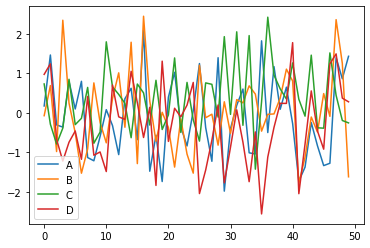

In [ ]:
arr= np.random.randn(50,4)
df= pd.DataFrame(arr, columns=['A','B','C','D'])
df.head()
df.plot()

In [ ]:
import plotly.graph_objects as go 
# Informacion de datos disponibles: https://plotly.com/python-api-reference/generated/plotly.data.html
# Precio de stocks de ['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT']
# para 2018/2019
df_stocks = px.data.stocks()
px.line(df_stocks, x='date',y='GOOG', labels={'x':'Fecha', 'y':'Precio'})

In [ ]:
px.line(df_stocks, x='date', y=['GOOG','AAPL'],labels={'x':'Date','y':'Price'},
        title='Apple vs Google')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL,
                         mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN,
                         mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG,
                         mode='lines+markers', name='Google',
                         line=dict(color='firebrick',width=2,
                                   dash='dashdot')))
fig.update_layout(title='Precio de acciones 2018/19',
                  xaxis_title='Precio',yaxis_title='Fecha')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL,
                         mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN,
                         mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG,
                         mode='lines+markers', name='Google',
                         line=dict(color='firebrick',width=2,
                                   dash='dashdot')))
fig.update_layout(
    xaxis=dict(showline=True, showgrid=False, showticklabels=True,
               linecolor='rgb(204,204,204)', linewidth=2, ticks='outside',
               tickfont=dict(family='Arial', size=12, color='rgb(82,82,82)')
               ),
               yaxis=dict(showgrid=False, zeroline=False, showline=False,
                          showticklabels=False                   
               ),
               autosize=False,
               margin=dict(
                   autoexpand=False,l=100, r=20, t=110),
                           showlegend=True, plot_bgcolor='white'
        )

# Bar charts

In [ ]:
df_us= px.data.gapminder().query("country=='United States'")
px.bar(df_us, x='year', y='pop')

In [ ]:
df_tips= px.data.tips()
px.bar(df_tips, x='day',y='tip',color='sex',
       title='Propinas por genero en cada dia',
       labels={'tip':'Propina', 'day':'Dia de trabajo'})

In [ ]:
df_europe= px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig=px.bar(df_europe, y='pop', x='country', text='pop', color='country')
fig.update_traces(texttemplate= '%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle= -45)
fig

# Scatterplot

In [ ]:
df_iris= px.data.iris()
px.scatter(df_iris, x='sepal_width', y='sepal_length',color='species', size='petal_length',
           hover_data=['petal_width'])

In [ ]:
fig= go.Figure()
fig.add_trace(go.Scatter(
  x=df_iris.sepal_width, y= df_iris.sepal_length, mode='markers',
  marker_color=df_iris.sepal_width, text=df_iris.species, marker=dict(showscale=True)
))
fig.update_traces(marker_line_width= 2, marker_size=10)

# Piecharts

In [ ]:
df_america= px.data.gapminder().query("year==2007").query("continent= ='Americas' and (country in ('Colombia','Uruguay','Argentina','Peru','Chile','Brazil','Ecuador','Venezuela','Paraguay','Bolivia'))")
px.pie(df_america, values='pop', names='country', title='Poblacion America',
       color_discrete_sequence= px.colors.sequential.RdBu)

In [ ]:
colors=['blue','green','black','purple','red','brown']
fig= go.Figure(data=[go.Pie(labels=['Water','Grass','Normal',
                                    'Psychic','Fire','Ground'],
                            values=[110,90,80,80,70,60])])
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  textinfo= 'label+percent',pull=[0.1, 0, 0.2, 0, 0, 0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))

# Histogramas

In [ ]:
df_tips= px.data.tips()
px.histogram(df_tips, x='total_bill',color='sex')

# Boxplots

In [ ]:
df_tips= px.data.tips()
px.box(df_tips, x='sex', y='tip', points='all')

In [ ]:
px.box(df_tips, x='day',y='tip',color='sex')

In [ ]:
fig= go.Figure()
fig.add_trace(go.Box(x=df_tips.sex, y=df_tips.tip, marker_color='blue',
                     boxmean='sd'))

In [ ]:
df_stocks= px.data.stocks()
fig= go.Figure()
fig.add_trace(go.Box(y=df_stocks.GOOG, boxpoints='all',
                     fillcolor='blue',jitter=0.5,
                     whiskerwidth=0.2))
fig.add_trace(go.Box(y=df_stocks.AAPL, boxpoints='all',
                     fillcolor='red',jitter=0.5,
                     whiskerwidth=0.2))
fig.update_layout(title='Google vs Apple',yaxis=dict(gridcolor='rgb(255,255,255)',
                                                     gridwidth= 3),
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)')

# Heatmap

In [ ]:
f= sns.load_dataset('flights')
fig= px.density_heatmap(f, x='year', y='month',z= 'passengers',
                        marginal_x= 'histogram',
                        marginal_y='histogram')
fig

# Actividad 1

In [15]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/JJTorresDS/ds-data-sources/main/properati_venta_201501.csv')
df

,id,created_on,operation,property_type,country_name,state_name,lat_lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2
0,8ebed78a3c75018c0351ef91a93e1098b03e75c8,2014-11-27,sell,apartment,Argentina,Córdoba,"-31.4121796494,-64.1712732402",62.0,62.0,888.847742
1,8a6dc3c73890f7cce002f8ee6f03bf1d8c04858c,2014-11-19,sell,house,Argentina,Córdoba,"-31.3686142,-64.2264862",240.0,180.0,487.503625
2,7222ebd6e652ea6c0df50c97988b8314a67b6a22,2014-09-03,sell,store,Argentina,Córdoba,"-32.6521427143,-62.3049577995",10000.0,1000.0,160.000000
3,6cf16e0c074d7f0d426c36ada31faba4d6b157f0,2015-01-05,sell,house,Argentina,Córdoba,"-31.3183975,-64.290657",325.0,16250.0,256.004892
4,d0e9ecf25d7215e5b1c29b4a6519f536ee6c0917,2014-12-01,sell,apartment,Argentina,Córdoba,"-31.4017318015,-64.2206747204",78.0,78.0,535.467821
...,...,...,...,...,...,...,...,...,...,...
18886,fea6e875390bd29e5816b76f10fdf08d735aa120,2014-07-17,sell,house,Argentina,Bs.As. G.B.A. Zona Oeste,NaN,200.0,40.0,375.000000
18887,ff89f4314dd78088a58967f4df0d9441f3823245,2014-09-24,sell,house,Argentina,Buenos Aires Interior,"-38.6932635,-62.2709836",200.0,140.0,750.000000
18888,48251babfa086011b8cfead936347ef8f211bbb1,2014-10-01,sell,house,Argentina,Bs.As. G.B.A. Zona Norte,"-34.3649989,-58.7406683",200.0,200.0,1750.000000
18889,fdc52ff7c3d362b489b5a0384f0b806c8d4c1ed9,2014-09-17,sell,house,Argentina,Bs.As. G.B.A. Zona Oeste,NaN,200.0,95.0,675.000000


In [17]:
# Separar la columna lat/lon
df[['lat', 'lon']]=df['lat_lon'].str.split(',', expand=True)
df.head()

,id,created_on,operation,property_type,country_name,state_name,lat_lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon
0,8ebed78a3c75018c0351ef91a93e1098b03e75c8,2014-11-27,sell,apartment,Argentina,Córdoba,"-31.4121796494,-64.1712732402",62.0,62.0,888.847742,-31.4121796494,-64.1712732402
1,8a6dc3c73890f7cce002f8ee6f03bf1d8c04858c,2014-11-19,sell,house,Argentina,Córdoba,"-31.3686142,-64.2264862",240.0,180.0,487.503625,-31.3686142,-64.2264862
2,7222ebd6e652ea6c0df50c97988b8314a67b6a22,2014-09-03,sell,store,Argentina,Córdoba,"-32.6521427143,-62.3049577995",10000.0,1000.0,160.000000,-32.6521427143,-62.3049577995
3,6cf16e0c074d7f0d426c36ada31faba4d6b157f0,2015-01-05,sell,house,Argentina,Córdoba,"-31.3183975,-64.290657",325.0,16250.0,256.004892,-31.3183975,-64.290657
4,d0e9ecf25d7215e5b1c29b4a6519f536ee6c0917,2014-12-01,sell,apartment,Argentina,Córdoba,"-31.4017318015,-64.2206747204",78.0,78.0,535.467821,-31.4017318015,-64.2206747204


In [19]:
df['lat']=df.lat.astype(float)
df['lon']=df.lon.astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18891 entries, 0 to 18890
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     18891 non-null  object 
 1   created_on             18891 non-null  object 
 2   operation              18891 non-null  object 
 3   property_type          18891 non-null  object 
 4   country_name           18891 non-null  object 
 5   state_name             18891 non-null  object 
 6   lat_lon                16176 non-null  object 
 7   surface_total_in_m2    10941 non-null  float64
 8   surface_covered_in_m2  12920 non-null  float64
 9   price_usd_per_m2       8541 non-null   float64
 10  lat                    16176 non-null  float64
 11  lon                    16176 non-null  float64
dtypes: float64(5), object(7)
memory usage: 1.7+ MB


In [21]:
pip install folium

In [22]:
import folium  #needed for interactive map
from folium.plugins import HeatMap

In [24]:
df.isnull().sum()

id                           0
created_on                   0
operation                    0
property_type                0
country_name                 0
state_name                   0
lat_lon                   2715
surface_total_in_m2       7950
surface_covered_in_m2     5971
price_usd_per_m2         10350
lat                       2715
lon                       2715
dtype: int64

In [25]:
df= df.dropna()
df.isnull().sum()

id                       0
created_on               0
operation                0
property_type            0
country_name             0
state_name               0
lat_lon                  0
surface_total_in_m2      0
surface_covered_in_m2    0
price_usd_per_m2         0
lat                      0
lon                      0
dtype: int64

In [33]:
# Precio
max_amount = float(df['price_usd_per_m2'].max())

folium_hmap = folium.Map(location=[-40, -120],
                        zoom_start=5,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(df['lat'], df['lon'], df['price_usd_per_m2'])),
                   min_opacity=0.8,
                   max_val=max_amount,
                   radius=10, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)

In [34]:
# Area
max_amount = float(df['price_usd_per_m2'].max())

folium_hmap = folium.Map(location=[-40, -120],
                        zoom_start=5,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(df['lat'], df['lon'], df['surface_total_in_m2'])),
                   min_opacity=0.8,
                   max_val=max_amount,
                   radius=10, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)

# Actividad colaborativa 2

In [3]:
!pip install gapminder

In [4]:
from gapminder import gapminder
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
gapminder.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [6]:
gapminder.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [10]:
import plotly.express as px
df_x= px.data.gapminder().query("year == 2007")
fig=px.bar(df_x, y='pop', x='country', text='pop', color='country')
fig.update_traces(texttemplate= '%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle= -45)
fig

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f9037d8-f2e9-4683-9ce3-67576f784ec7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>